## Usage of one explainer

Take EFM and Exp_EFM as an example, and use dataset amazon_toy.

In [1]:
from cornac.datasets import amazon_toy
from cornac.data.reader import Reader
from cornac.eval_methods import StratifiedSplit
from cornac.data.sentiment import SentimentModality
from cornac.models import EFM
from cornac.explainer import Exp_EFM

# Load the Amazon toy dataset
rating = amazon_toy.load_feedback(fmt="UIRT", reader=Reader(min_user_freq=50))
sentiment_data = amazon_toy.load_sentiment(reader=Reader(min_user_freq=50))

md = SentimentModality(data=sentiment_data)

eval_method = StratifiedSplit(
    data=rating,
    group_by="user",
    chrono=True,
    sentiment=md,
    test_size=0.2,
    exclude_unknowns=True,
    verbose=True,
)

# Instantiate the EFM model
efm = EFM(
    max_iter=20,
    num_explicit_factors=128,
    num_latent_factors=128,
    num_most_cared_aspects=100,
    rating_scale=5.0,
    alpha=0.9,
    lambda_x=1,
    lambda_y=1,
    lambda_u=0.01,
    lambda_h=0.01,
    lambda_v=0.01,
    trainable=True,
)
efm.fit(eval_method.train_set)


# Instantiate the explainer
explainer = Exp_EFM(rec_model=efm, dataset=eval_method.train_set)


/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/tensorflow/python/debug/cli/debugger_cli_common.py:19: DeprecationWarning: module 'sre_constants' is deprecated
  import sre_constants


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 119
Number of items = 4058
Number of ratings = 7197
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 119
Number of items = 4058
Number of ratings = 741
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 119
Total items = 4058


### Explain recommendations

In [2]:
# first, we need some recommendations
some_users = eval_method.test_set.user_ids[:3]
recomedations = efm.recommend_to_multiple_users(some_users, k=5)
print(recomedations)

           user_id     item_id  prediction
0   A30H2335OM7RD6  B002UQ74TC    3.806868
1   A30H2335OM7RD6  158978068X    3.797966
2   A30H2335OM7RD6  B0035EQDT0    3.669016
3   A30H2335OM7RD6  B00007DWBV    3.630523
4   A30H2335OM7RD6  B000TFKX5S    3.623701
5   A3R01WHD75L6FG  158978068X    3.672833
6   A3R01WHD75L6FG  B002UQ74TC    3.612236
7   A3R01WHD75L6FG  B0035EQDT0    3.565538
8   A3R01WHD75L6FG  B00007DWBV    3.550565
9   A3R01WHD75L6FG  B000WCOJZ8    3.499438
10  A19FRW264WZTGP  158978068X    2.931284
11  A19FRW264WZTGP  B002UQ74TC    2.901551
12  A19FRW264WZTGP  B0035EQDT0    2.837688
13  A19FRW264WZTGP  B00007DWBV    2.819377
14  A19FRW264WZTGP  B000WCOJZ8    2.812701


In [3]:
explainer.explain_recommendations(recomedations)

Computing explanations:   0%|          | 0/15 [00:00<?, ?it/s]

,user_id,item_id,prediction,explanations
0,A30H2335OM7RD6,B002UQ74TC,3.806868,"{'furby': 5.473794, 'toy': 5.437067, 'really':..."
1,A30H2335OM7RD6,158978068X,3.797966,"{'furby': 4.883235, 'toy': 5.3531513, 'really'..."
2,A30H2335OM7RD6,B0035EQDT0,3.669016,"{'furby': 5.188692, 'toy': 4.9752855, 'really'..."
3,A30H2335OM7RD6,B00007DWBV,3.630523,"{'furby': 4.965329, 'toy': 4.8083344, 'really'..."
4,A30H2335OM7RD6,B000TFKX5S,3.623701,"{'furby': 5.008148, 'toy': 5.4199085, 'really'..."
5,A3R01WHD75L6FG,158978068X,3.672833,"{'toy': 5.3531513, 'doll': 5.8261538, 'quality..."
6,A3R01WHD75L6FG,B002UQ74TC,3.612236,"{'toy': 5.437067, 'doll': 5.3184996, 'quality'..."
7,A3R01WHD75L6FG,B0035EQDT0,3.565538,"{'toy': 4.9752855, 'doll': 5.2258997, 'quality..."
8,A3R01WHD75L6FG,B00007DWBV,3.550565,"{'toy': 4.8083344, 'doll': 5.1018744, 'quality..."
9,A3R01WHD75L6FG,B000WCOJZ8,3.499438,"{'toy': 5.1053133, 'doll': 5.2008896, 'quality..."


### Explain one user-item pair

In [4]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
explanation = explainer.explain_one_recommendation_to_user(one_user, one_item)
print(f"For User {one_user} and Item {one_item}:")
print("Explanation:")
print(explanation)

For User A30H2335OM7RD6 and Item B00000IZQE:
Explanation:
{'furby': 3.9829283, 'toy': 4.2949157, 'really': 3.9804723}


### Explain one user-item with ref-item

In [5]:
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ref_item = eval_method.train_set.item_ids[10]
explanation = explainer.explain_one_with_ref(user_id=one_user, item_id=one_item, ref_item_id=ref_item)
explanation

,user_id,item_id,explanation,ref_item_id,ref_explanation
0,A30H2335OM7RD6,B00000IZQE,"{'furby': 3.9829283, 'toy': 4.2949157, 'really...",1581170769,"{'furby': 4.003364, 'toy': 4.206687, 'really':..."


In [6]:
# explanation for user-item
print(explanation['explanation'])
# and explanation for user-ref_item
print(explanation['ref_explanation'])

0    {'furby': 3.9829283, 'toy': 4.2949157, 'really...
Name: explanation, dtype: object
0    {'furby': 4.003364, 'toy': 4.206687, 'really':...
Name: ref_explanation, dtype: object


### Generate plot for Exp_EFM

In [7]:
users = eval_method.test_set.user_ids
recommendations = efm.recommend_to_multiple_users(users, k=10)
explanations = explainer.explain_recommendations(recommendations, feature_k=6)
explanations_df = explanations.copy()

Computing explanations:   0%|          | 0/1190 [00:00<?, ?it/s]

/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/cornac-2.0.0-py3.11-linux-x86_64.egg/cornac/visualization/visualization.py:297: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(x_count, rotation=45)
/home/linan/miniconda3/envs/cornac/lib/python3.11/site-packages/cornac-2.0.0-py3.11-linux-x86_64.egg/cornac/visualization/visualization.py:299: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(x_coeff, rotation=45)


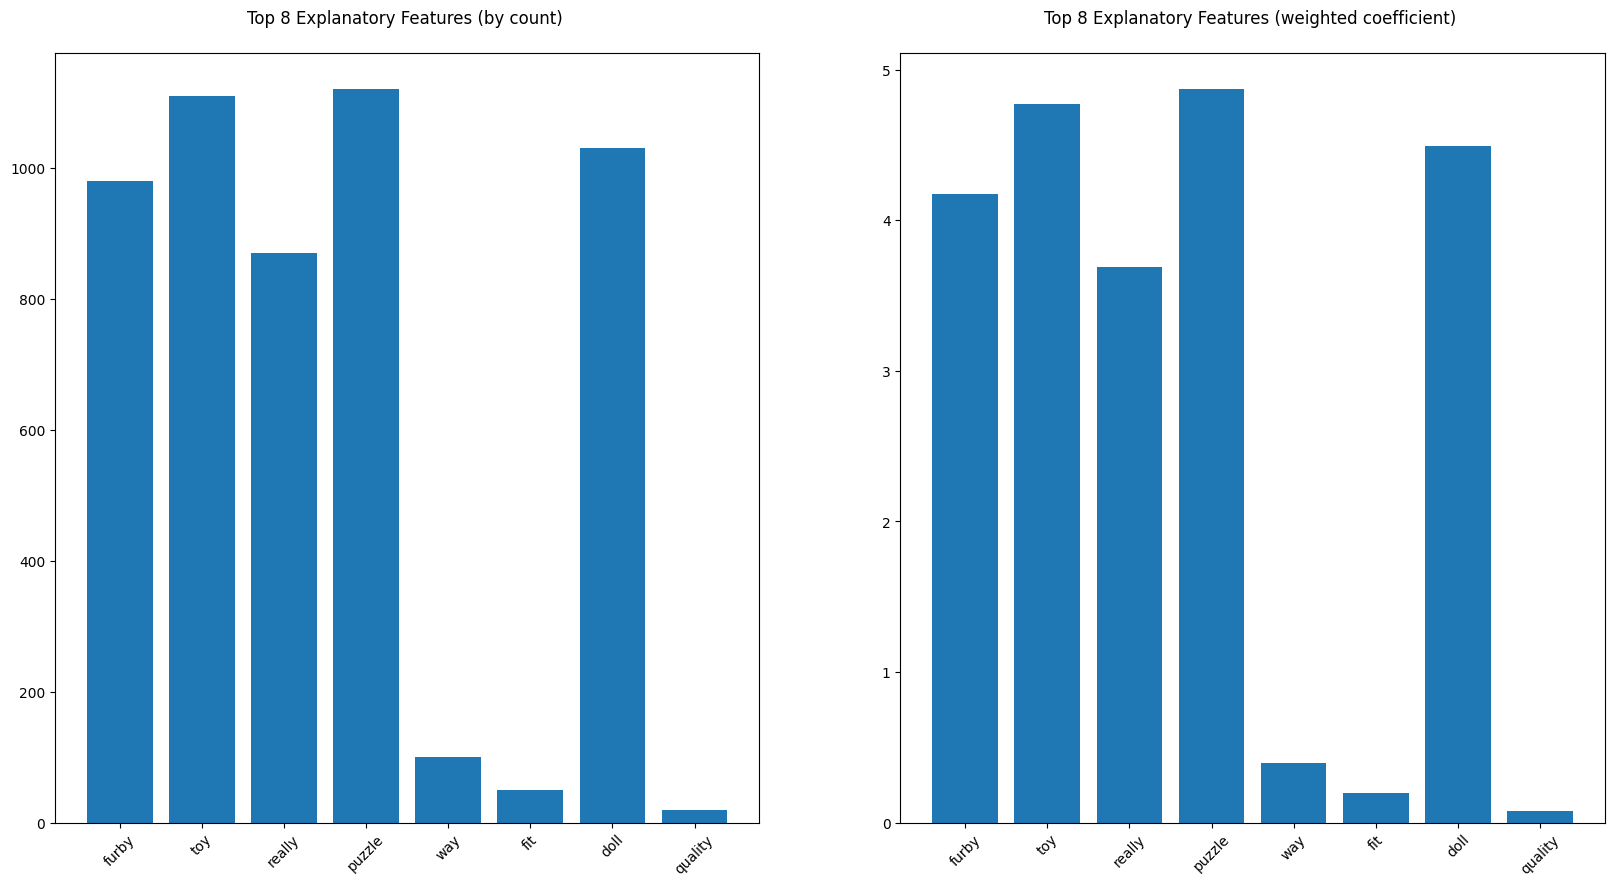

In [8]:
from cornac.visualization import Visualization
my_plots = Visualization()

# Create a plot for a specific user and item
one_user = eval_method.train_set.user_ids[0]
one_item = eval_method.train_set.item_ids[0]
ind_df = my_plots.create_individual_feature_importance_plot(
    explanations,
    user_id=one_user,
    item_id=one_item,
    type="bar",
    top_k=6,
    save_plot=False,
)

filtered_df = my_plots.create_aggregate_feature_importance_plot(
    explanations, type="bar", top_k=8, save_plot=False
)